#Some Reinforcemnet Learning: Using Policy & Value Iteration and Q-learning for a Markov Decision Process in Python and R

The following problems appeared as a project in the *edX course ColumbiaX: CSMM.102x Machine Learning*. Here is the description of the problem:

In [16]:
#ipython nbconvert pcaiso.ipynb
%matplotlib inline

from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

Consider the following **3-state MDP** for a robot trying to walk, the three states being '**Fallen**', '**Standing**' and '**Moving**', as shown in the following figure.

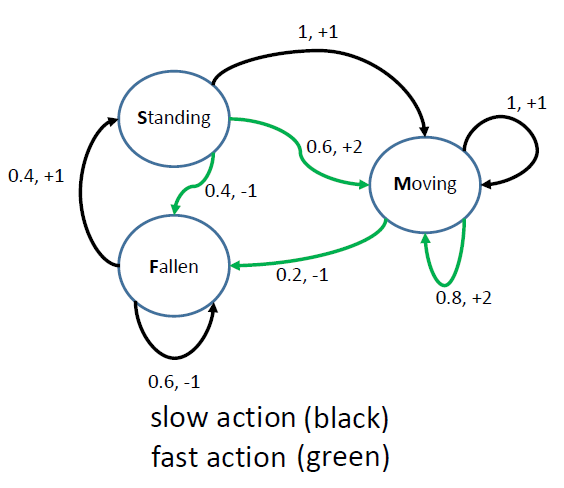

In [3]:
from IPython.display import Image
Image(filename='C:\\courses\\Edx\\Current\\AI\\Week9\\imr1.png')

(1) First use **policy iteration** method to find optimal policy for discount factor $\gamma$=0.1. Try using this method with a different discount factor, for example a much larger discount factor like 0.9 or 0.99, or a much smaller one like 0.01. Does the optimal policy change?

(2) Now, try using **value iteration** method instead. How does the number of iterations change? What about the complexity of implementing each iteration?

(3) Implement **Q-learning** method (without exploration) for this simple **MDP**. Run this script several times. Does the algorithm always converge? 

(4) Now, try adding a simple **epsilon greedy exploration** and rerun the **q-learning** method. 

The following theory is going to be used for implementation of the algorithms:

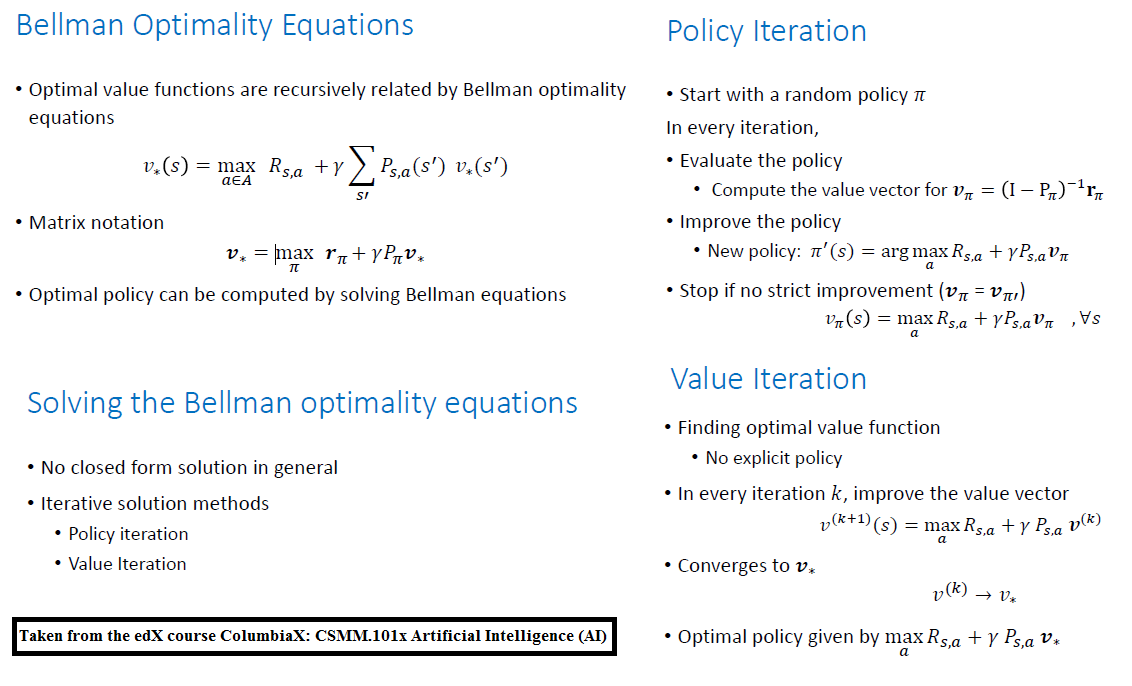

In [5]:
Image(filename='C:\\courses\\Edx\\Current\\AI\\Week9\\imr2.png')

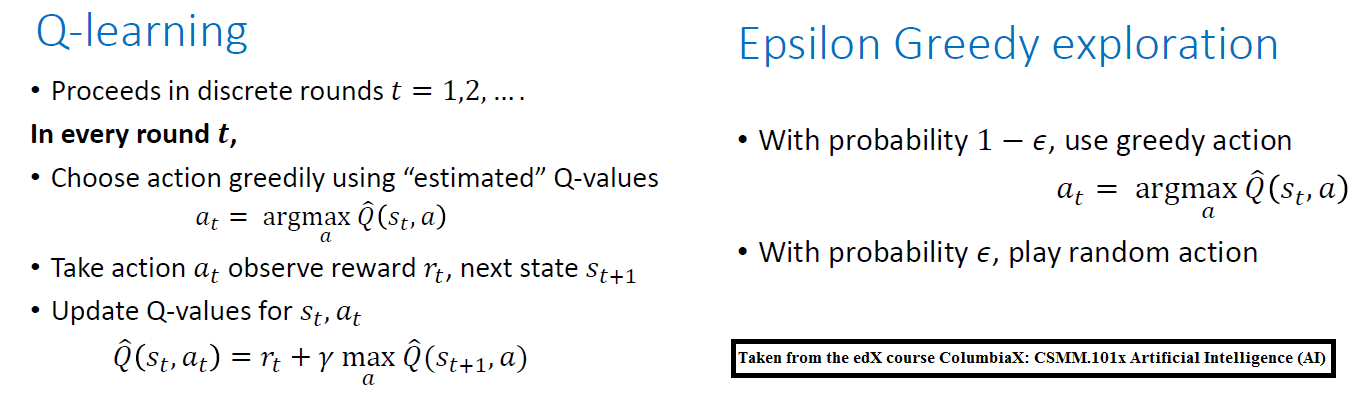

In [7]:
Image(filename='C:\\courses\\Edx\\Current\\AI\\Week9\\imr3.png')

(1) The **policy iteration** method was implemented in *python*, where starting from the policy {Slow, Slow, Slow}, policy evaluation and improvement steps were apllied iteratively. As can be seen from the following results, a change in **optimal policy** happened at higher value of the discount factor $\gamma$. The following figures (*R* visualizations) show how the **optimal value vector** changes with different values of $\gamma$.

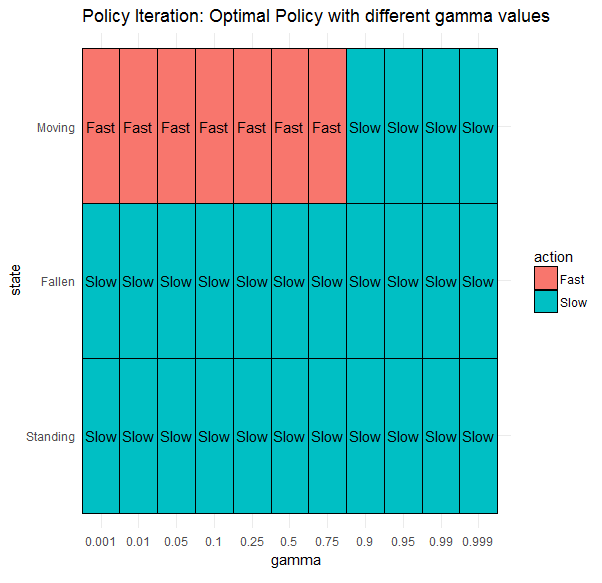

In [8]:
Image(filename='C:\\courses\\Edx\\Current\\AI\\Week9\\pi_op.png')

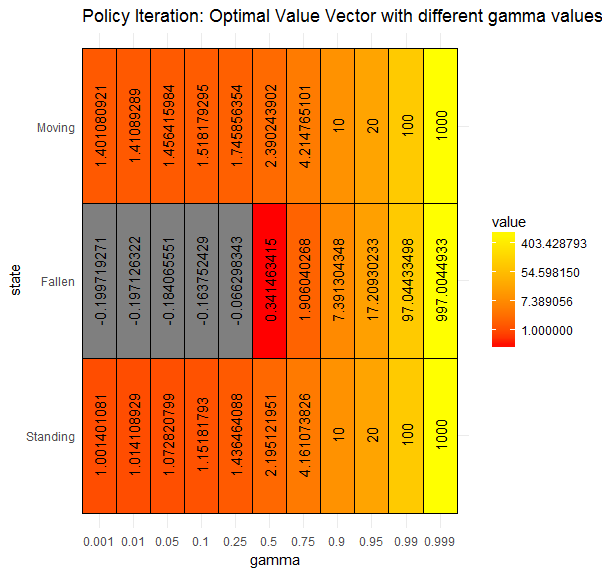

In [9]:
Image(filename='C:\\courses\\Edx\\Current\\AI\\Week9\\pi_ov.png')

#### Policy Iteration: changes in the value vector corresponding to the optimal policy 

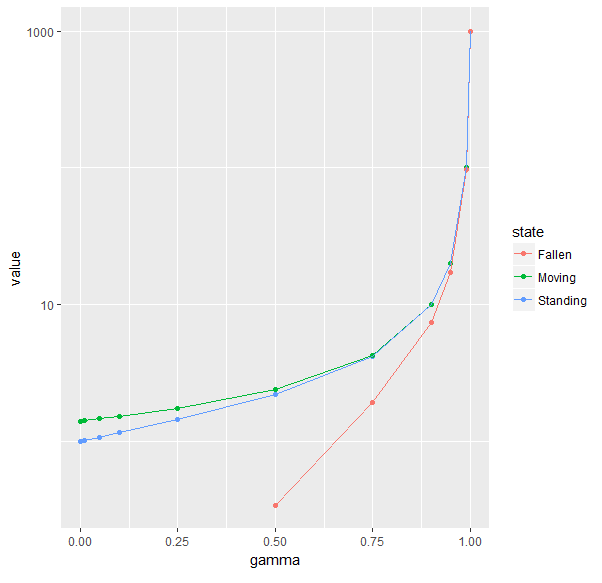

In [10]:
Image(filename='C:\\courses\\Edx\\Current\\AI\\Week9\\pi_ov2.png')

(2) The **value iteration** method was implemented similarly, it took much higher number of iterations to converge than the **policy iteration** method, although it individual iterations were much less complex. As can be seen from the following results, a change in **optimal policy** happened at higher value of the discount factor $\gamma$. The following figures show how the **optimal value vector** changes with different values of $\gamma$. Also, as can be seen, an increase in $\gamma$ (for which the expected future rewards became more important) resulted in a corresponding increase in the #iterations for the convergence of the value-iteration algorithm convergence (e.g., for $\gamma=0.99$ the value iteration method took more than 1000 iterations to converge).

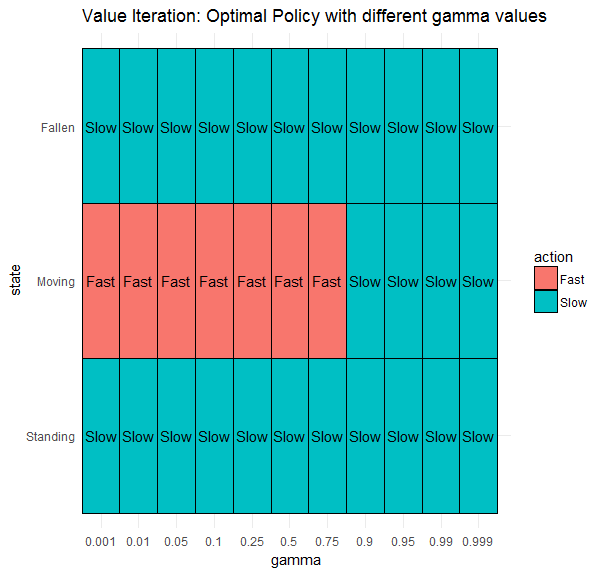

In [11]:
Image(filename='C:\\courses\\Edx\\Current\\AI\\Week9\\vi_op.png')

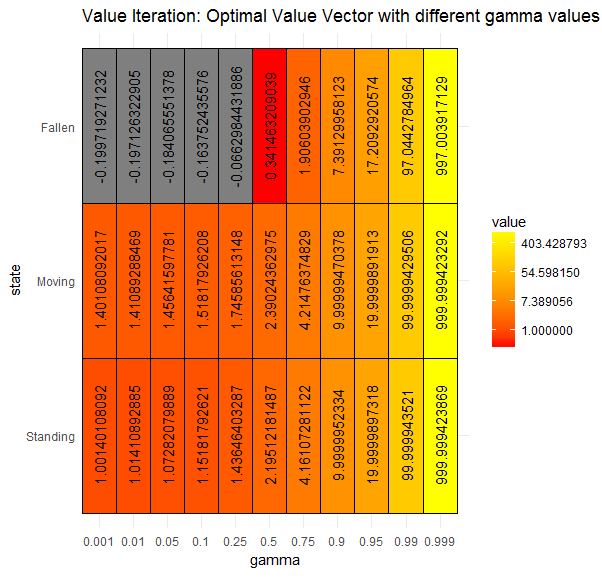

In [12]:
Image(filename='C:\\courses\\Edx\\Current\\AI\\Week9\\vi_ov.png')

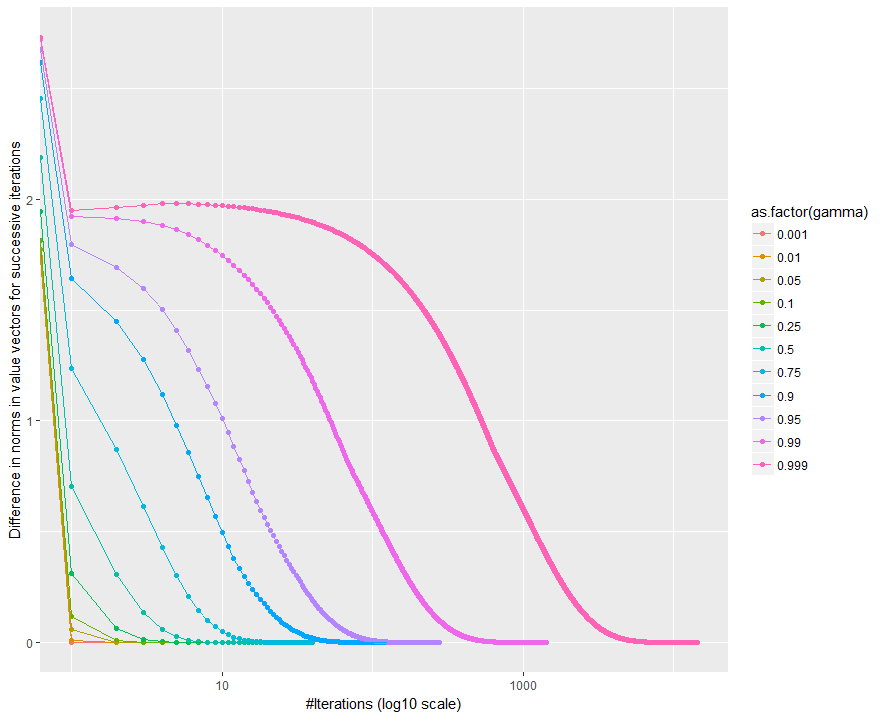

In [13]:
Image(filename='C:\\courses\\Edx\\Current\\AI\\Week9\\vi_ov2.png')

(3) **Q-learning** without exploration: The algorithm was implemented by using weighted random sampling from the set of states, with the weights proportional to the corresponding probabilities, for any *(state, action)* at each time step, starting from the '**Fallen**' state at time step 0. 

For **convergence**, the algorithm was run until the difference in the **norm** of the learnt **Q matrices** in two successive iterations became < $10^{-6}$ and for at least 20 time steps.

As expected, without exploration, the '**Fast**' action in the '**Moving**' state (although actually with higher expected reward) does not get a chance to be explored ever and it always converges with the **optimal policy** as '**Slow**' action for all the states. With higher $\gamma$, the number of iterations to converge becomes higher and the value for **(Moving, Slow)** in the **Q** matrix learnt becomes higher at convergence. 

The following figures show the **Q matrix** learnt at convergence for different values of $\gamma$.

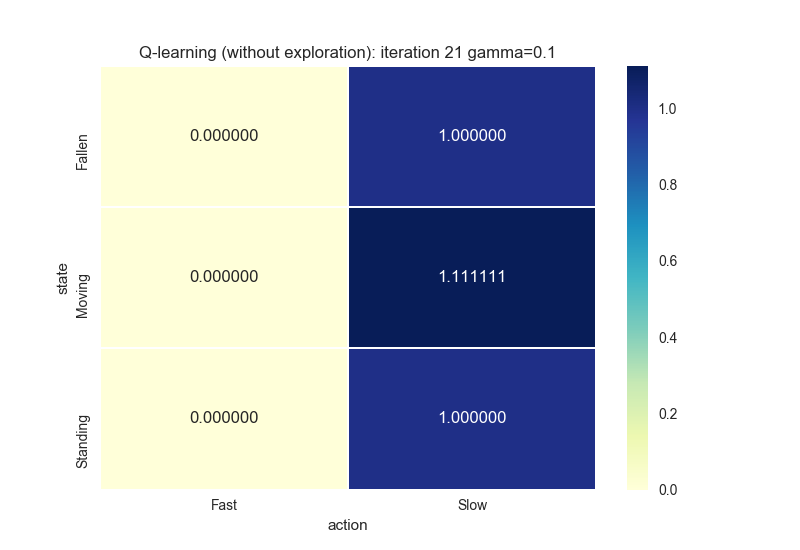

In [15]:
Image(filename='C:\\courses\\Edx\\Current\\AI\\Week9\\q_no_explore_0.1.png')

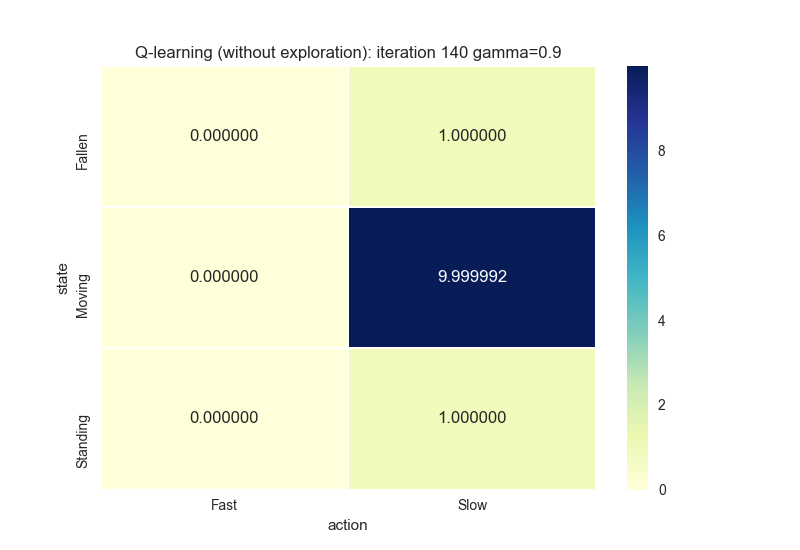

In [16]:
Image(filename='C:\\courses\\Edx\\Current\\AI\\Week9\\q_no_explore_0.9.png')

(3) $\epsilon$ greedy **Q-learning** with **exploration**: with probability equal to $\epsilon$, a random state was explored next, along with the greedy transition. As expected, with exploration, the '**Fast**' action at the **Moving** state also gets explored sometimes (the frequency of exploration depends on the value of $\epsilon$ chosen) and sometimes it converges with the **optimal policy** as '**Slow**' action for the states '**Fallen**' & '**Standing**' and '**Fast**' action for the '**Moving**' state, as expected. 

The following figures show two sample runs of the *epslion greedy* **Q-learning** with $\epsilon=0.1$, each one converging at a different optimal policy.

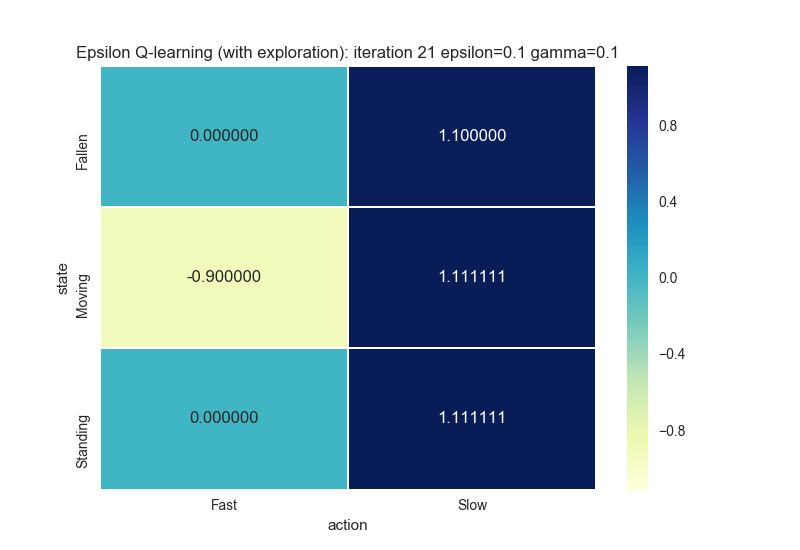

In [21]:
Image(filename='C:\\courses\\Edx\\Current\\AI\\Week9\\q_explore_0.1_0.1_1.png')

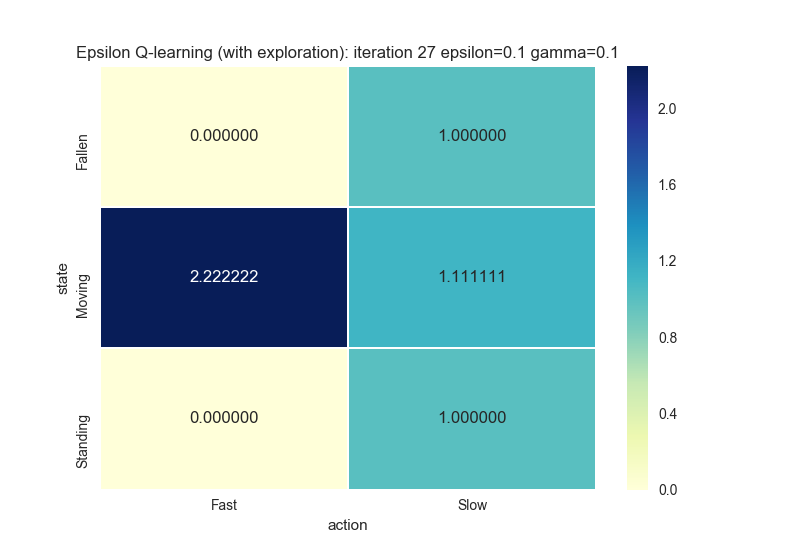

In [22]:
Image(filename='C:\\courses\\Edx\\Current\\AI\\Week9\\q_explore_0.1_0.1_2.png')

#### Results with $\epsilon=0.1$

Since different runs converged at different policies with $\epsilon=0.1$, the algorithm was run 100 times and the frequencies of the unique **Q matrix** learnt (with values rounded to 1 decimal place) was noted, as shown in the following figure. 

1. For 4 out of 100 cases the **optimal policy** learnt by the Q matrix was '**Slow**' action for the states '**Fallen**' & '**Standing**' and '**Fast**' action for the '**Moving**' state.

2. For 92 out of 100 cases the **optimal policy** learnt by the Q matrix was '**Slow**' action for all the states.

3. For 4 out of 100 cases the **optimal policy** learnt by the Q matrix was '**Slow**' action for the states '**Fallen**' & '**Moving**' and '**Fast**' action for the '**Standing**' state.

4. For 45 out of 100 cases the '**Fast**' action at the '**Moving**' state is still unexplored.

In [23]:
Image(filename='C:\\courses\\Edx\\Current\\AI\\Week9\\q_explore_0.1_0.1_all.png')

The above results suggest that $\epsilon=0.1$ is probably not exploring enough and its value should be increased.

####Results with  ϵ=0.5

Again the algorithm was run 100 times and the frequencies of the unique Q matrix learnt (with values rounded to 1 decimal place) was noted, as shown in the following figure.

1. For 33 out of 100 cases the optimal policy learnt by the Q matrix was '**Slow**' action for the states '**Fallen**' & '**Standing**' and '**Fast**' action for the '**Moving**' state.

2. For 37 out of 100 cases the optimal policy learnt by the Q matrix was '**Slow**' action for all the states.

3. For 15 ut of 100 cases the optimal policy learnt by the Q matrix was '**Slow**' action for the states '**Fallen**' & '**Moving**' and '**Fast**' action for the '**Standing**' state.

4. For 15 ut of 100 cases the optimal policy learnt by the Q matrix was '**Fast**' action for the states '**Standing**' & '**Moving**' and '**Slow**' action for the '**Fallen**' state.

In [ ]:
Image(filename='C:\\courses\\Edx\\Current\\AI\\Week9\\q_explore_0.1_0.5_all.png')